## Setting up the environnement

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_dataset = pd.read_csv("../ML/project-files-music-genre-classification-with-pca/music_dataset_mod.csv", index_col=False)
music_dataset.head()

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908          0.713015           0.000000   
2          18.006722        77.642913         80.652946          87.692110   
3          68.603329        63.536557         74.888346          76.239108   
4          31.295163        81.121030         36.178193          23.381542   

   Ambient Sound Influence  Instrumental Overlaps      Genre  
0                96.439665              53.771763    Country  
1                17.327295              15.017146  Classical  
2                95.125207              25.308020       Rock  
3                97.016998              96.893109    Hip-hop  
4                53.753793              30.142986    Country

In [3]:
music_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

Genre variable is defined as a pandas object that must be handled for future computations.

In [4]:
music_dataset.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [5]:
music_dataset['Genre'].value_counts()

Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

While the counts are not exactly equal, they are relatively close, indicating a balanced distribution.
The goal of this project now seems to be clear, let's predict missing Genres using the other variables.

In [38]:
correlation_dataset = music_dataset.dropna(subset=['Genre']).copy()
correlation_dataset

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
973  133.807084       43.093084       88.711355            38.195402   
996  126.570862       57.812829       90.809940            64.880583   
997  121.731543       51.385204       33.849400            17.044544   
998   97.070804       19.210429       62.662860            22.720453   
999   71.050781       32.967250       62.875776            78.868747   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768                    17.628630   
1                      47.280419                   -15.618194   
2                       5.984994                    50.467388   
3                      47.715584                    87.335201   
4                     108.177637                    25.865590   
..                           ...                          ...   
973                    25.365896                    87.613700   
996                    40.437517                    38.051344   
997                    84.483481                    13.312790   
998                    66.917937                    80.590809   
999                    88.094454                    59.148014   

     Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0            46.545522        75.839434         79.378892          71.753088   
1            85.421085       100.455908          0.713015           0.000000   
2            18.006722        77.642913         80.652946          87.692110   
3            68.603329        63.536557         74.888346          76.239108   
4            31.295163        81.121030         36.178193          23.381542   
..                 ...              ...               ...                ...   
973          74.603838        87.775499         28.055663          19.389458   
996          66.204244        95.770959          1.745673           6.729019   
997           8.953013        64.068960         90.738580          96.043437   
998          51.403310        50.828636         68.518232          55.119045   
999          83.420324        59.582109         37.329193          44.576693   

     Ambient Sound Influence  Instrumental Overlaps      Genre  
0                  96.439665              53.771763    Country  
1                  17.327295              15.017146  Classical  
2                  95.125207              25.308020       Rock  
3                  97.016998              96.893109    Hip-hop  
4                  53.753793              30.142986    Country  
..                       ...                    ...        ...  
973                74.576379              59.205448    Hip-hop  
996                82.042218              43.590027  Classical  
997                 5.499350              74.604889       Rock  
998                21.781372              24.716517       Rock  
999                87.458414              78.270683       Jazz  

[890 rows x 13 columns]

In [39]:
X = correlation_dataset.drop(columns=['Genre'])

In [8]:
X.head()

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908          0.713015           0.000000   
2          18.006722        77.642913         80.652946          87.692110   
3          68.603329        63.536557         74.888346          76.239108   
4          31.295163        81.121030         36.178193          23.381542   

   Ambient Sound Influence  Instrumental Overlaps  
0                96.439665              53.771763  
1                17.327295              15.017146  
2                95.125207              25.308020  
3                97.016998              96.893109  
4                53.753793              30.142986

In [40]:
y = correlation_dataset['Genre']

In [10]:
y.head().to_frame()

Genre
0    Country
1  Classical
2       Rock
3    Hip-hop
4    Country

Now i'll transform categorical data into numerical

In [41]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [42]:
X['Genre_encoded'] = y_encoded
df_encoded_genre = X.copy()
df_encoded_genre

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
973  133.807084       43.093084       88.711355            38.195402   
996  126.570862       57.812829       90.809940            64.880583   
997  121.731543       51.385204       33.849400            17.044544   
998   97.070804       19.210429       62.662860            22.720453   
999   71.050781       32.967250       62.875776            78.868747   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768                    17.628630   
1                      47.280419                   -15.618194   
2                       5.984994                    50.467388   
3                      47.715584                    87.335201   
4                     108.177637                    25.865590   
..                           ...                          ...   
973                    25.365896                    87.613700   
996                    40.437517                    38.051344   
997                    84.483481                    13.312790   
998                    66.917937                    80.590809   
999                    88.094454                    59.148014   

     Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0            46.545522        75.839434         79.378892          71.753088   
1            85.421085       100.455908          0.713015           0.000000   
2            18.006722        77.642913         80.652946          87.692110   
3            68.603329        63.536557         74.888346          76.239108   
4            31.295163        81.121030         36.178193          23.381542   
..                 ...              ...               ...                ...   
973          74.603838        87.775499         28.055663          19.389458   
996          66.204244        95.770959          1.745673           6.729019   
997           8.953013        64.068960         90.738580          96.043437   
998          51.403310        50.828636         68.518232          55.119045   
999          83.420324        59.582109         37.329193          44.576693   

     Ambient Sound Influence  Instrumental Overlaps  Genre_encoded  
0                  96.439665              53.771763              1  
1                  17.327295              15.017146              0  
2                  95.125207              25.308020              4  
3                  97.016998              96.893109              2  
4                  53.753793              30.142986              1  
..                       ...                    ...            ...  
973                74.576379              59.205448              2  
996                82.042218              43.590027              0  
997                 5.499350              74.604889              4  
998                21.781372              24.716517              4  
999                87.458414              78.270683              3  

[890 rows x 13 columns]

The encoded y has 5 categories from 0 to 4 which is the same number of Genres we saw previously.

In [13]:
print(len(y_encoded), X.shape, len(y))

890 (890, 12) 890


I'll split data into training and test set

In [43]:
# correlation matrix also (covariance matrix)
correlation_matrix = df_encoded_genre.corr()

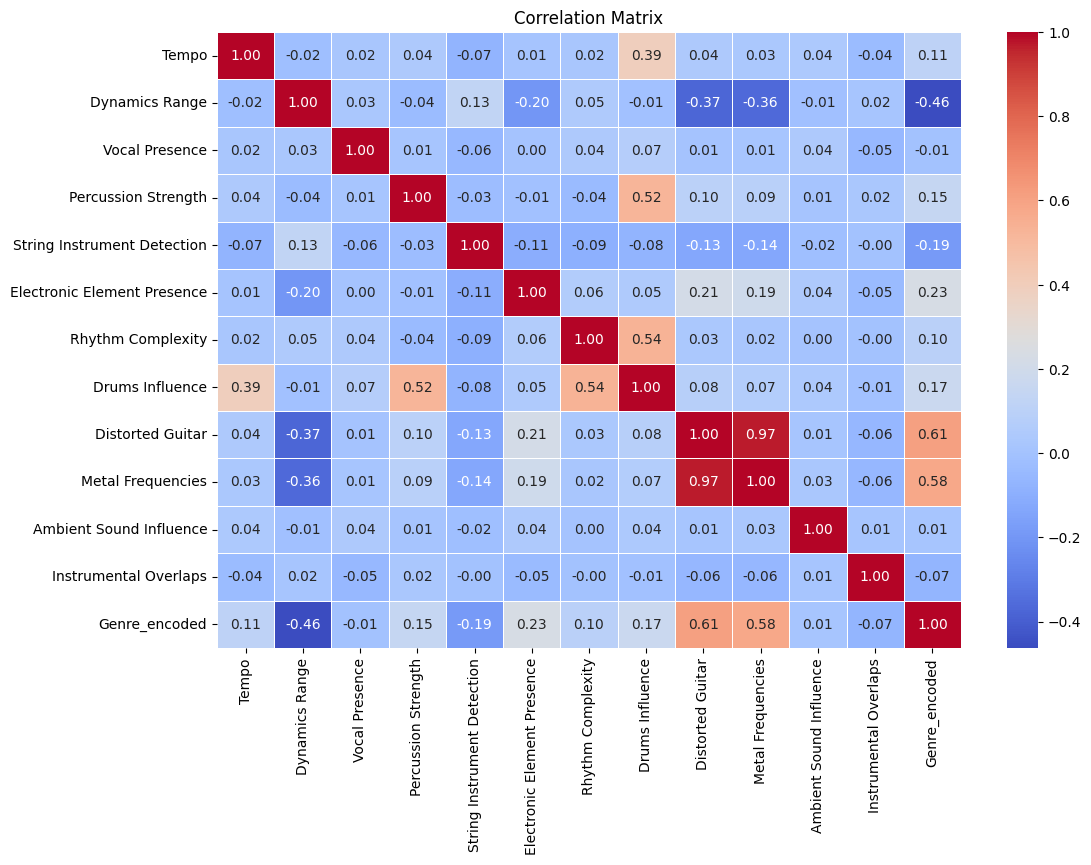

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("../ML/project-files-music-genre-classification-with-pca/corrMatrix.png")
plt.show()

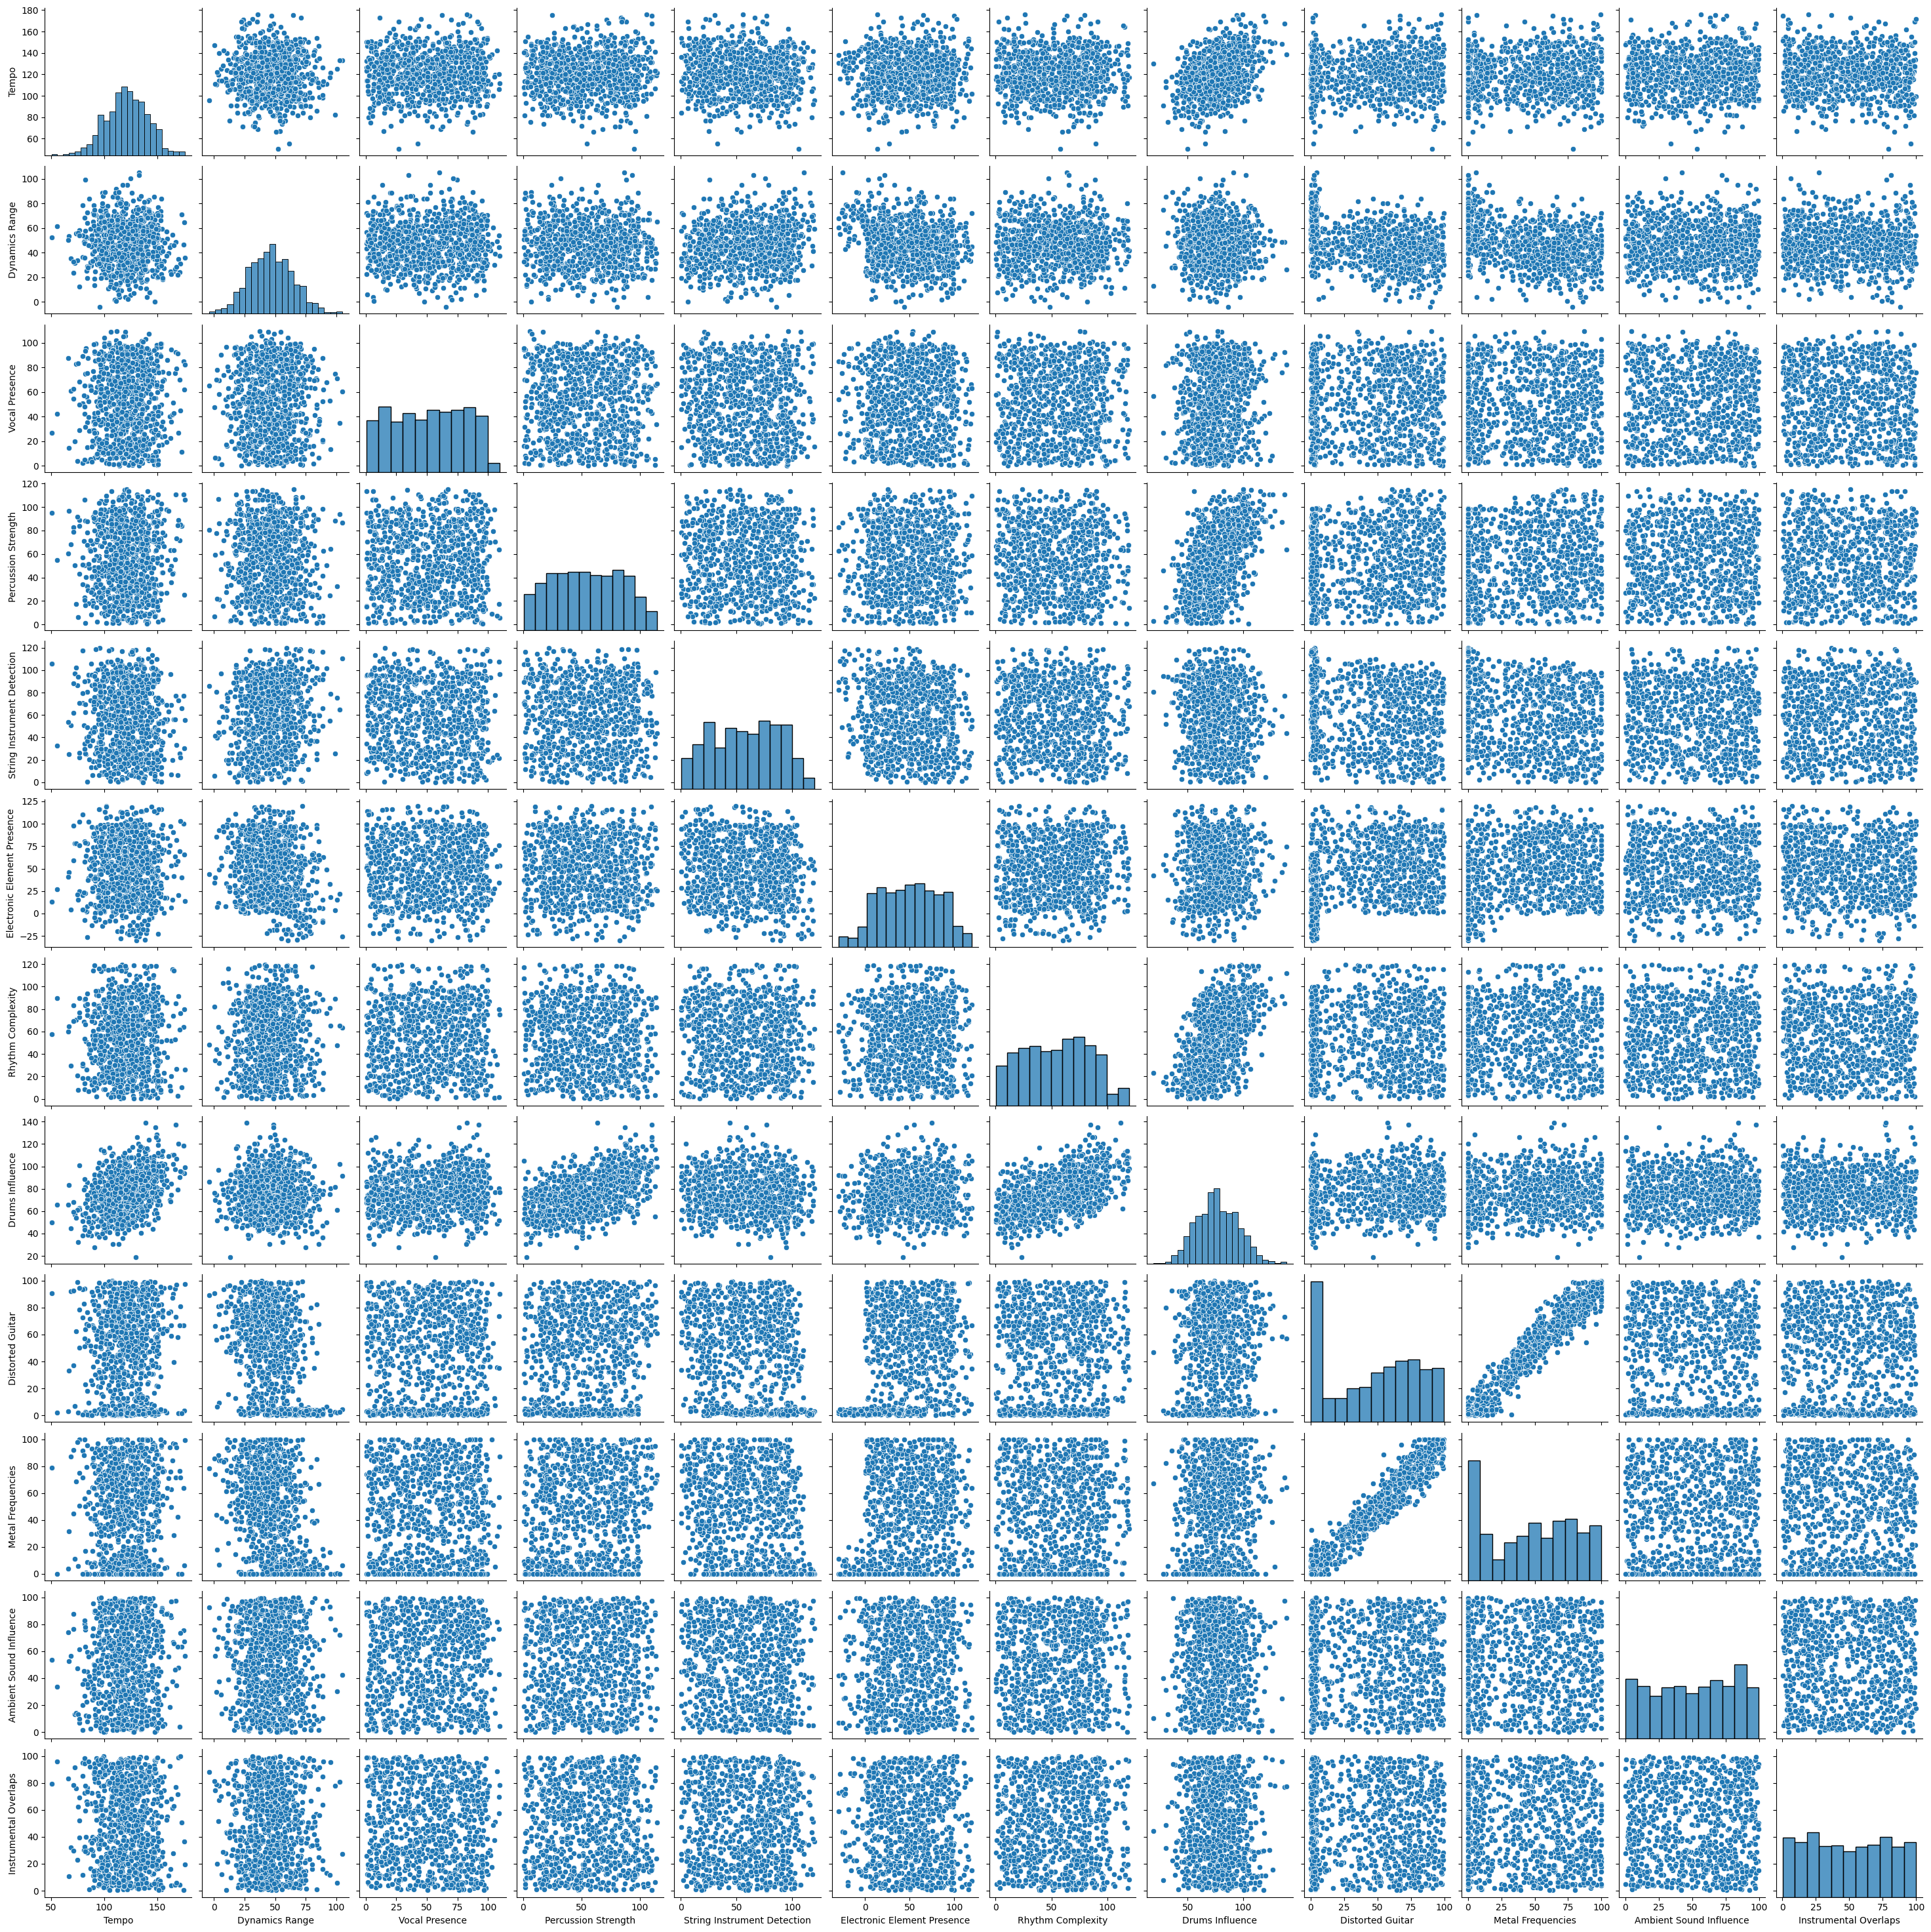

In [18]:
sns.pairplot(correlation_dataset)
plt.savefig("../ML/project-files-music-genre-classification-with-pca/pairplot.png")

As we have many features it is difficult to get isights from the data regarding Genre variable, this is why we will be using Principal Component Analysis (PCA) to reduce the number of features while preserving most of the variance in the data.

## PCA for Dimensionality Reduction

Algorithm :
1. Mean Normalization : the algorithm starts by subtracting the mean of each feature (column) from the corresponding values in that feature. This centers the data around the origin.
2. Compute the Covariance Matrix : The covariance matrix represents the relationships between pairs of features and measures how much they vary together.
3. Eigen Decomposition : calculate eigenvalues and corresponding eigenvectors on the covariance matrix; The eigenvectors represent the principal components, and the eigenvalues represent the amount of variance explained by each principal component.
4. Sort Eigenvalues and Eigenvectors in decending order : This ensures that the principal components are ordered by the amount of variance they explain.
5. Select Principal Components : Select the top k eigenvectors (principal components) that correspond to the largest eigenvalues. These principal components capture most of the variability in the data.
6. Project Data onto Principal Component(Compute Score Matrix) by computing the dot product between the mean-centered data matrix and the matrix containing the selected principal components.

In [45]:
# Normalization
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X.drop(columns='Genre_encoded')) # X_scaled = Z 😁
print(X_scaled.shape)

(890, 12)


In [46]:
pca = PCA()

- Explained Variance Ratio : $EVR_i = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}$
where $\lambda_i$ is the eigenvalue corresponding to the $i^{th}$ principal component
- Cumulative Variance Ratio : $CVR_i = \sum_{k=1}^{i} EVR_k$

In [47]:
X_pca = pca.fit_transform(X_scaled)
print(X_pca, "\nShape:", X_pca.shape)

[[-1.0572597   0.28161626  0.62342202 ...  0.74994362 -0.41133069
  -0.20089952]
 [ 1.86454175  2.72389526 -0.06110915 ... -0.46808373 -0.06524083
  -0.03262838]
 [-1.86197335  0.0390771   0.30639382 ...  1.12924615 -0.20497339
   0.13108671]
 ...
 [-0.41959195 -2.19097097  1.57481878 ...  0.61746001  0.86535466
   0.11015801]
 [-0.59721268 -2.33887467 -0.91433944 ... -0.92203511 -0.11584256
  -0.27384145]
 [ 0.33474784 -0.75956161  0.16804437 ... -0.96472679 -0.77845888
   0.16213001]] 
Shape: (890, 12)


Our data is still not transformed as required, we must specify the number of components we want to select in order to reduce dementioality.

In [48]:
# principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio by Components:")
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {explained_variance:.3f}")

# cumulative explained variance
print("\nCumulative Explained Variance:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio):
    print(f"Component {i + 1}: {cumulative_variance:.3f}")

Explained Variance Ratio by Components:
Component 1: 0.201
Component 2: 0.151
Component 3: 0.094
Component 4: 0.087
Component 5: 0.085
Component 6: 0.082
Component 7: 0.079
Component 8: 0.076
Component 9: 0.070
Component 10: 0.060
Component 11: 0.013
Component 12: 0.003

Cumulative Explained Variance:
Component 1: 0.201
Component 2: 0.351
Component 3: 0.445
Component 4: 0.532
Component 5: 0.617
Component 6: 0.699
Component 7: 0.778
Component 8: 0.855
Component 9: 0.925
Component 10: 0.985
Component 11: 0.997
Component 12: 1.000


- As the explained variance ratio is not high for the components we can be sure now that PCA is working as intended.
- Using the cumulative variance we can select a number of components that can capture for example at least 90% of the data, in this case n_components = 8.

In [49]:
# number of components to explain at least 80% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
n_components

8

In [50]:
# PCA with the selected number of components
pca_selected = PCA(n_components=8)
X_transformed = pca_selected.fit_transform(X_scaled)
print(X_transformed.shape)

(890, 8)


In [51]:
pca_df = pd.DataFrame(X_transformed)
pca_df

0         1         2         3         4         5         6  \
0   -1.057260  0.281616  0.623422  0.735745 -1.293288  1.054393  0.249949   
1    1.864542  2.723895 -0.061109  0.923268  1.779717  1.346512  1.061424   
2   -1.861973  0.039077  0.306394  1.912146 -1.217001  0.293621  0.668750   
3   -1.548107 -0.999450 -0.235448 -1.455017 -2.194899 -0.755390 -0.819764   
4    0.850767  0.573042  0.509150  2.192870  0.401860  0.511776 -0.191877   
..        ...       ...       ...       ...       ...       ...       ...   
885  0.029673  1.086737 -2.036945  0.039393 -1.149244  0.008914  0.577949   
886  1.256279  1.942137 -1.043884  0.948175 -0.810536  0.617701  0.290307   
887 -0.419592 -2.190971  1.574819 -0.296949  1.016398 -0.100270  0.474963   
888 -0.597213 -2.338875 -0.914339 -0.344213  1.158969  0.135833  0.021345   
889  0.334748 -0.759562  0.168044 -1.001572 -0.970337  2.280795 -1.541049   

            7  
0   -0.271587  
1    0.170341  
2    0.491388  
3   -0.476381  
4   -0.068358  
..        ...  
885  0.366849  
886  0.308294  
887 -1.955507  
888  0.887020  
889  1.217697  

[890 rows x 8 columns]

Now that we have a dimentionality reduced dataset, let's train and evaluate a Logistic Regression classifier using the principal components obtained from PCA.

In [53]:
# training classifier on PCA transformed data
Xreg_train_pca, Xreg_test_pca, yreg_train_pca, yreg_test_pca = train_test_split(X_transformed, y_encoded, test_size=0.3, random_state=42)

# Train and evaluate Logistic Regression on principal components
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(Xreg_train_pca, yreg_train_pca)
y_pred_pca = logreg_pca.predict(Xreg_test_pca)

# performance on principal components
accuracy_pca = accuracy_score(yreg_test_pca, y_pred_pca)
print("\nAccuracy with Principal Components:", accuracy_pca)
print("Classification Report with Principal Components:")
print(classification_report(yreg_test_pca, y_pred_pca))


Accuracy with Principal Components: 0.5355805243445693
Classification Report with Principal Components:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [55]:
# classifier
logreg = LogisticRegression(max_iter=10000)

# training classifier on original dataset
Xreg_train_origin, Xreg_test_origin, yreg_train_origin, yreg_test_origin = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# we fit the classifier to our training data
logreg.fit(Xreg_train_origin, yreg_train_origin)

# prediction
ypred_origin = logreg.predict(Xreg_test_origin)

# performance on original features
accuracy_origin = accuracy_score(yreg_test_origin, ypred_origin)
print("Accuracy with Original Features:", accuracy_origin)
print("Classification Report with Original Features:")
print(classification_report(yreg_test_origin, ypred_origin))

Accuracy with Original Features: 0.5280898876404494
Classification Report with Original Features:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



In [56]:
print("Accuracy difference=", np.abs(accuracy_origin-accuracy_pca))

Accuracy difference= 0.0074906367041198685


In [57]:
print(Xreg_train_pca.shape, yreg_train_pca.shape)

(623, 8) (623,)


Text(0.5, 1.0, 'Accuracy: 0.5355805243445693')

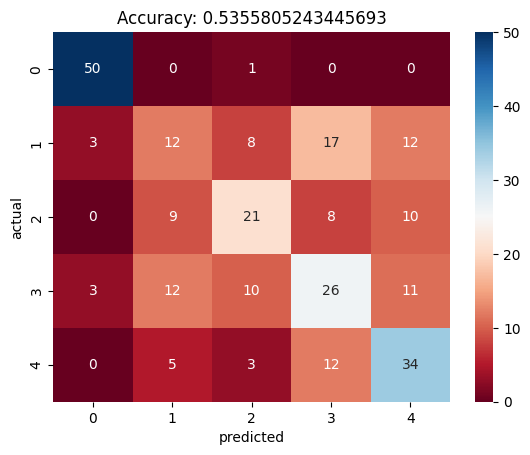

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yreg_test_pca, y_pred_pca)
sns.heatmap(cm, annot=True, cmap=('RdBu'))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title(f'Accuracy: {accuracy_pca}')

Comparing the two reports we can conclude that the logistic classifier performed well on the PCA-transformed data (as expected).
Now let's predict missing values in the original dataset.

In [59]:
matrix = [[], []]
for i,(prediction, test) in enumerate(zip(y_pred_pca, yreg_test_pca)):
    if prediction!=test:
        #print(f"Actual : {test} vs Predicted : {prediction}")
        matrix[0].append(prediction)
        matrix[1].append(test)
df = pd.DataFrame(np.transpose(matrix), columns=['Prediction', 'Actual'])
# Genres = list(music_dataset['Genre'].unique())
df.value_counts()

Prediction  Actual
3           1         17
1           3         12
3           4         12
4           1         12
            3         11
2           3         10
4           2         10
1           2          9
2           1          8
3           2          8
1           4          5
0           1          3
            3          3
2           4          3
            0          1
Name: count, dtype: int64

## Predicting missing Genres

In [60]:
music_missing_genres = music_dataset[music_dataset['Genre'].isnull()].copy()
music_missing_genres

Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
13   104.389822       65.826509       45.855410            55.655533   
18   101.367152       47.843370       93.230347            67.101777   
22    85.130539       55.707108       81.149615            21.473425   
31   121.100952       71.769727       49.609529            82.539647   
42    93.546825       44.563761       56.587554            99.546134   
..          ...             ...             ...                  ...   
991  130.719110       65.990957       21.775950            91.817048   
992  117.892313       35.001524       76.506358            77.972570   
993  104.315096       26.173723        3.334345            42.132602   
994  121.863373       50.872678       70.100162           106.212013   
995   66.578839       54.533872       99.782246            95.633310   

     String Instrument Detection  Electronic Element Presence  \
13                     76.058845                    55.625315   
18                     20.932163                    50.772288   
22                     14.959208                    61.017283   
31                     47.670106                   119.460607   
42                    109.735122                    30.128106   
..                           ...                          ...   
991                    34.029452                   105.525736   
992                    80.765657                    13.759213   
993                    38.434513                    66.522798   
994                    66.573813                    89.927526   
995                    91.414514                    19.396142   

     Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
13           25.312585        59.202818          0.920308           0.000000   
18           30.348312        62.950165         64.462755          68.971944   
22           64.000152        43.332846         70.455879          79.053598   
31           68.812707        83.727876         95.307620          95.779062   
42           48.392807        81.888793         97.200948         100.000000   
..                 ...              ...               ...                ...   
991          28.552899        99.587397          1.414556           0.000000   
992          59.985923        80.108786         93.831262         100.000000   
993          62.051560        79.475348         61.390214          52.925363   
994           3.009635        79.634816         15.398297          31.235519   
995          36.280860        78.298955          4.890606           4.638077   

     Ambient Sound Influence  Instrumental Overlaps Genre  
13                 94.308889              27.441046   NaN  
18                 21.690071              94.717315   NaN  
22                 20.420619              99.499498   NaN  
31                  2.883916              19.230684   NaN  
42                 16.380240              55.483399   NaN  
..                       ...                    ...   ...  
991                59.447447              74.901837   NaN  
992                15.851851              47.984445   NaN  
993                50.383816              52.630256   NaN  
994                11.997421              57.281283   NaN  
995                75.479656              95.990077   NaN  

[110 rows x 13 columns]

In [61]:
Xm = music_missing_genres.drop(columns='Genre')
Xm_scaled = std_scaler.fit_transform(Xm)
Xm_pca = pca_selected.fit_transform(Xm_scaled)
Xm_pca.shape

(110, 8)

In [62]:
ym_pred = logreg_pca.predict(Xm_pca)
ym_pred

array([0, 2, 1, 4, 4, 1, 1, 4, 4, 1, 4, 2, 4, 4, 1, 0, 4, 1, 1, 3, 3, 3,
       3, 4, 2, 4, 3, 1, 0, 4, 0, 1, 3, 4, 4, 2, 3, 0, 1, 1, 1, 3, 3, 4,
       4, 1, 3, 0, 0, 1, 1, 4, 3, 2, 4, 1, 1, 4, 3, 4, 1, 0, 0, 3, 2, 4,
       2, 0, 1, 4, 1, 2, 4, 4, 0, 2, 4, 2, 2, 0, 4, 0, 4, 0, 0, 2, 0, 1,
       3, 3, 0, 4, 4, 3, 3, 4, 3, 2, 0, 4, 0, 1, 2, 4, 4, 3, 4, 2, 3, 0])

In [63]:
music_missing_genres.loc[:,'Genre_predicted'] = label_encoder.inverse_transform(ym_pred)
music_missing_genres[['Genre_predicted']]

Genre_predicted
13        Classical
18          Hip-hop
22          Country
31             Rock
42             Rock
..              ...
991            Jazz
992            Rock
993         Hip-hop
994            Jazz
995       Classical

[110 rows x 1 columns]